In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/question-pairs-dataset/questions.csv


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/question-pairs-dataset/questions.csv')

In [4]:
df.shape

(404351, 6)

In [5]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
287717,287717,565383,565384,Why do some people still think the Earth is flat?,Why do some people today still believe that th...,1
85270,85270,169347,169348,Is hydroxide an ionic bond?,Is H2O a covalent or ionic bond?,0
148174,148174,293160,293161,What will happen if by somehow the speed of li...,What will happen if we somehow reach the speed...,1
180344,180344,356214,356215,Can an L2 visa holder work without EAD?,What are the rules of an L2 visa holder in the...,0
157169,157169,310803,310804,What is the best weekend escapade from Pune?,What are some places to spend the weekend near...,1
69626,69626,138395,138396,What's the cheapest physician to do an I-485 m...,How much does a medical exam for I-485 cost?,0
42812,42812,85269,85270,How do you put the Kenwood KDC-135 radio on au...,How do I get a job as a talk radio host?,0
174703,174703,345155,345156,Why didn't I get a bid during sorority rush ev...,Should I spend an extra semester repeating all...,0
358761,358761,702547,702548,Which are the best colleges offering BCS cours...,"If there was a foam block that is 1km2, can I ...",0
360032,360032,704969,704970,What should be done to avoid watching porn?,Catholics: how do I stop watching internet porn?,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
#check missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [8]:
# as we can see there are 1 missing value in question1 and 2 missing value in question2
df.dropna(inplace=True)
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [9]:
# distribution of is_duplicate
df['is_duplicate'].value_counts()

is_duplicate
0    255042
1    149306
Name: count, dtype: int64

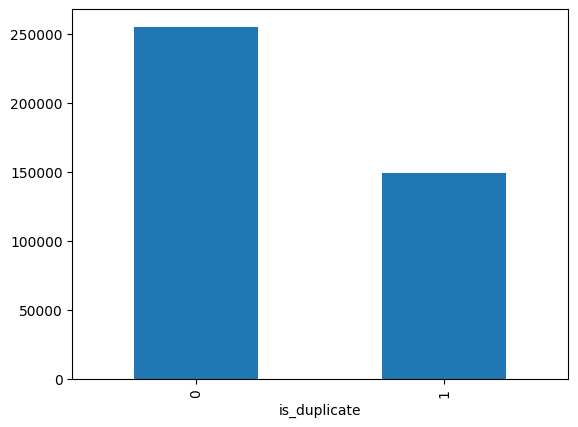

In [10]:
# bar plot
df['is_duplicate'].value_counts().plot(kind='bar')
plt.show()

In [11]:
# as this is a huge data set so i will take 1000000 data due to lack of resources
new_df=df.sample(50000)
new_df.shape

(50000, 6)

In [12]:
ques_df=new_df[['question1','question2']]
ques_df.head()
ques_df.shape

(50000, 2)

#### Using Bag of words

In [13]:
# import count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
#create a list of Question1 and Question2
questions=list(ques_df['question1'])+list(ques_df['question2'])
questions[:5]

# take maxfeature 3000 
cv=CountVectorizer(max_features=2000)

# create bag of words and split it into question1 and question2
question1,question2=np.vsplit(cv.fit_transform(questions).toarray(),2)



In [14]:
temp_df1=pd.DataFrame(question1,index=ques_df.index)
temp_df2=pd.DataFrame(question2,index=ques_df.index)

#concat temp_df1 and temp_df2
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(50000, 4000)

In [15]:
# adding is_duplicate column to the temp_df dataframe
temp_df['is_duplicate'] = new_df['is_duplicate']
temp_df

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,is_duplicate
70167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
322803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28639,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
285249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
75573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
281772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
340643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)
X_train.shape

(40000, 4000)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7563

In [18]:
#  with xgboost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7394

In [19]:
# naive bayes algorithm
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.6117

## Using Bag of Words and basic feature engineering

In [20]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate
70167,70167,139462,139463,Are there any sperm donors in Bangalore?,Are there any mitzvot that hasten the coming o...,0
322803,322803,633232,633233,Why the civilians do not leave Aleppo?,Why won't they evacuate the civilians from Ale...,1
28639,28639,57101,57102,Is it okay to book a ticket with a different s...,"As we know, in some trains we can board in sle...",0
9423,9423,18819,18820,What's the scope of psychology?,What is the scope of psychology?,1
285249,285249,560613,560614,Did Nikola Tesla contact extraterrestrial inte...,Is it true that Nikola Tesla communicated with...,1
...,...,...,...,...,...,...
146970,146970,290798,290799,What is your new year resolution for 2017 or g...,What are some of the best New Years resolution...,1
75573,75573,150172,150173,Why can't I stop eating junk food?,Why can’t I stop eating junk food?,1
281772,281772,553894,553895,What is the best water purifier available in I...,Which is the best water purifier for the home?...,1
340643,340643,667733,667734,What does it mean if some of my visitors are f...,Are there any unlisted VPNs?,0


In [21]:
# feature engineering
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [22]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
70167,70167,139462,139463,Are there any sperm donors in Bangalore?,Are there any mitzvot that hasten the coming o...,0,40,57
322803,322803,633232,633233,Why the civilians do not leave Aleppo?,Why won't they evacuate the civilians from Ale...,1,38,50
28639,28639,57101,57102,Is it okay to book a ticket with a different s...,"As we know, in some trains we can board in sle...",0,117,146
9423,9423,18819,18820,What's the scope of psychology?,What is the scope of psychology?,1,31,32
285249,285249,560613,560614,Did Nikola Tesla contact extraterrestrial inte...,Is it true that Nikola Tesla communicated with...,1,55,54
...,...,...,...,...,...,...,...,...
146970,146970,290798,290799,What is your new year resolution for 2017 or g...,What are some of the best New Years resolution...,1,59,57
75573,75573,150172,150173,Why can't I stop eating junk food?,Why can’t I stop eating junk food?,1,34,34
281772,281772,553894,553895,What is the best water purifier available in I...,Which is the best water purifier for the home?...,1,51,96
340643,340643,667733,667734,What does it mean if some of my visitors are f...,Are there any unlisted VPNs?,0,68,28


In [23]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
70167,70167,139462,139463,Are there any sperm donors in Bangalore?,Are there any mitzvot that hasten the coming o...,0,40,57,7,10
322803,322803,633232,633233,Why the civilians do not leave Aleppo?,Why won't they evacuate the civilians from Ale...,1,38,50,7,8
28639,28639,57101,57102,Is it okay to book a ticket with a different s...,"As we know, in some trains we can board in sle...",0,117,146,23,26
9423,9423,18819,18820,What's the scope of psychology?,What is the scope of psychology?,1,31,32,5,6
285249,285249,560613,560614,Did Nikola Tesla contact extraterrestrial inte...,Is it true that Nikola Tesla communicated with...,1,55,54,6,9


In [24]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
70167,70167,139462,139463,Are there any sperm donors in Bangalore?,Are there any mitzvot that hasten the coming o...,0,40,57,7,10,3
322803,322803,633232,633233,Why the civilians do not leave Aleppo?,Why won't they evacuate the civilians from Ale...,1,38,50,7,8,4
28639,28639,57101,57102,Is it okay to book a ticket with a different s...,"As we know, in some trains we can board in sle...",0,117,146,23,26,5
9423,9423,18819,18820,What's the scope of psychology?,What is the scope of psychology?,1,31,32,5,6,4
285249,285249,560613,560614,Did Nikola Tesla contact extraterrestrial inte...,Is it true that Nikola Tesla communicated with...,1,55,54,6,9,2


In [25]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
70167,70167,139462,139463,Are there any sperm donors in Bangalore?,Are there any mitzvot that hasten the coming o...,0,40,57,7,10,3,17
322803,322803,633232,633233,Why the civilians do not leave Aleppo?,Why won't they evacuate the civilians from Ale...,1,38,50,7,8,4,15
28639,28639,57101,57102,Is it okay to book a ticket with a different s...,"As we know, in some trains we can board in sle...",0,117,146,23,26,5,41
9423,9423,18819,18820,What's the scope of psychology?,What is the scope of psychology?,1,31,32,5,6,4,11
285249,285249,560613,560614,Did Nikola Tesla contact extraterrestrial inte...,Is it true that Nikola Tesla communicated with...,1,55,54,6,9,2,15


In [26]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
70167,70167,139462,139463,Are there any sperm donors in Bangalore?,Are there any mitzvot that hasten the coming o...,0,40,57,7,10,3,17,0.18
322803,322803,633232,633233,Why the civilians do not leave Aleppo?,Why won't they evacuate the civilians from Ale...,1,38,50,7,8,4,15,0.27
28639,28639,57101,57102,Is it okay to book a ticket with a different s...,"As we know, in some trains we can board in sle...",0,117,146,23,26,5,41,0.12
9423,9423,18819,18820,What's the scope of psychology?,What is the scope of psychology?,1,31,32,5,6,4,11,0.36
285249,285249,560613,560614,Did Nikola Tesla contact extraterrestrial inte...,Is it true that Nikola Tesla communicated with...,1,55,54,6,9,2,15,0.13


In [27]:
question_df= new_df[['question1','question2']]
question_df.head()

,question1,question2
70167,Are there any sperm donors in Bangalore?,Are there any mitzvot that hasten the coming o...
322803,Why the civilians do not leave Aleppo?,Why won't they evacuate the civilians from Ale...
28639,Is it okay to book a ticket with a different s...,"As we know, in some trains we can board in sle..."
9423,What's the scope of psychology?,What is the scope of psychology?
285249,Did Nikola Tesla contact extraterrestrial inte...,Is it true that Nikola Tesla communicated with...


In [28]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(50000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
70167,0,40,57,7,10,3,17,0.18
322803,1,38,50,7,8,4,15,0.27
28639,0,117,146,23,26,5,41,0.12
9423,1,31,32,5,6,4,11,0.36
285249,1,55,54,6,9,2,15,0.13


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(question_df['question1']) + list(question_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [30]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(50000, 6000)

In [31]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(50000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
70167,0,40,57,7,10,3,17,0.18,0,0,...,0,0,0,0,0,0,0,0,0,0
322803,1,38,50,7,8,4,15,0.27,0,0,...,0,0,0,0,0,0,0,0,0,0
28639,0,117,146,23,26,5,41,0.12,0,0,...,0,1,0,0,0,0,0,0,0,0
9423,1,31,32,5,6,4,11,0.36,0,0,...,0,0,0,0,0,0,0,0,0,0
285249,1,55,54,6,9,2,15,0.13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred) 

0.7864

In [34]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7828